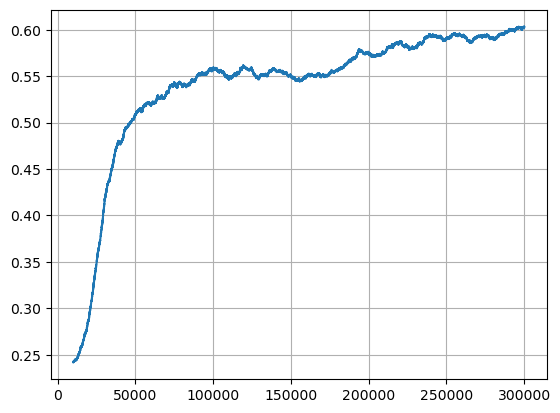

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

result_list = [
    '/Users/taduylam/Workspace/Lab/0/3. MovableAntennaWithSecurity_WirelessComm-main/massRun/base_model/monitor_log/PPO_1764862919no_custom_name_PPO_timeStep_300000.monitor.csv'
]

def convert_str_arr(series):
    return series.apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))


for path in result_list:
    df = pd.read_csv(path, skiprows=1)
    converted = convert_str_arr(df['user_security_rate'])

# convert Series → 2D numpy array
matrix = np.vstack(converted.values)
user_security_rate_arr = matrix.sum(axis=1)


fig, ax = plt.subplots()
rolling_mean = pd.Series(user_security_rate_arr).rolling(window=10000).mean()
ax.plot(rolling_mean)
plt.grid()
plt.show()

